<a href="https://colab.research.google.com/github/Shibasish1993/Computer-Vision-Projects/blob/main/Fake_Image_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake Image or Painting Detection

Goal: With this implementation we can find the similarity or difference between two nearly same images. We can even plot the images with the boudng boxes highlighting the differences. Also we will calculate the similarity index to conclude whether the two images are same or not.

Application: This project can be utilised to find the fake images or paintings. It can even be implemented to find the tampering part of any official documents, ID cards etc.

Tools used: Here we will be using the following major libraries -

*   cv2 (i.e., Python OpenCV library)
*   skimage
*   imutils
*   PyDrive

Steps: The following steps are followed here (overview)
1.   Connect the colab with Google drive
2.   Import a pair of images (1 real and 1 fake), and load in colab
3. Preprocess the two images
4. Calculate Mean Square Error and Structural Similarity
5. Plot the similarity and difference plots
6. Summary







In [1]:
# Used the following code lines to load the data from  Google Drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
# Authenticate the credentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
#Get the files with the Id (to get the id, right click on the file in the google drive --> shared link --> copy the id and paste here)
downloaded = drive.CreateFile({'id':'1dt9hKcO_ulIwC-PaNWdq2ww9HTIsnTv3'})
downloaded.GetContentFile('Mona-Lisa.zip') 

In [4]:
# Unzipping the images
images_path = "Mona-Lisa.zip"
from zipfile import ZipFile
with ZipFile(images_path, 'r') as zip:
         zip.extractall()

In [5]:
import cv2

def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels in BGR order. So we need to reverse them with -1
    return img[...,::-1]

In [6]:
# Collecting the real and fake images in variables
org = load_image('Mona-Lisa real.jpg')
fake = load_image('Mona-Lisa fake.jpg')

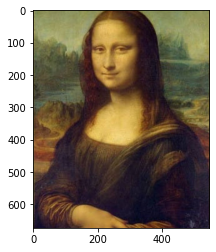

In [7]:
# Plotting both the real and fake images with the help of matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(org)

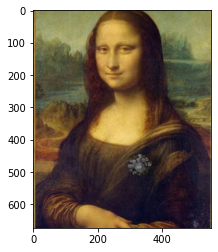

In [8]:
plt.imshow(fake) # plotting the fake image

In [9]:
# Another way of collecting the images with the help of OpenCv library
imageA = cv2.imread("Mona-Lisa real.jpg")
imageB = cv2.imread("Mona-Lisa fake.jpg")
# Changing the image to gray-scale (pixel intensities will be in between 0 to 255)
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

In [10]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the sum of the squared difference between the two images; with numpy as follows
  #import numpy as np
  #Y = np.square(np.subtract(img1,img1)).mean()
  #print("MSE:", Y)
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err

In [11]:
# Importing the necessary libraries
from skimage.metrics import structural_similarity as ssim
import numpy as np
import cv2

In [12]:
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = ssim(imageA, imageB)
	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("Mean-Squared-Error: %.2f, Structural-Similarity: %.2f" % (m, s))
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
	# show the images
	plt.show()

In [13]:
# Checking the dimension of the real image
print(grayA.shape[::-1])

(546, 674)


In [14]:
# Converting the two images in the same dimension
grayB = cv2.resize(grayB,grayA.shape[::-1])

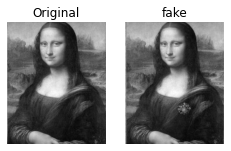

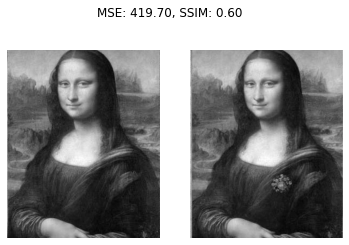

In [15]:
# initialize the figures
fig = plt.figure("Images")
images = ("Original", grayA), ("fake", grayB)

# loop over the images and create the combined plot
for (i, (name, image)) in enumerate(images):
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
 
# show the combined figure
plt.show()

# compare the two images side by side
compare_images(grayA, grayB, "Original vs. fake")

In [18]:
# Investigating further with ssim thresold and difference parameters
(score, diff) = ssim(grayA, grayB, full=True)
diff=(diff*255).astype("uint8") # to normalise the difference
print("The two images are {}% similar".format(score*100))

The two images are 59.63412822244327% similar


In [19]:
# Thresolding and finding contours with cv2 library
th = cv2.threshold(diff,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnt1 = cv2.findContours(th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Grabbing the contours to plot further
import imutils
cnt2 = imutils.grab_contours(cnt1)

In [20]:
# Drawing the rectangles around the real and fake images
for i in cnt2:
  (x,y,w,h) = cv2.boundingRect(i)
  cv2.rectangle(grayA, (x,y), (x+w,y+h),(0,0,255),2)
  cv2.rectangle(grayB, (x,y), (x+w,y+h),(0,0,255),2)

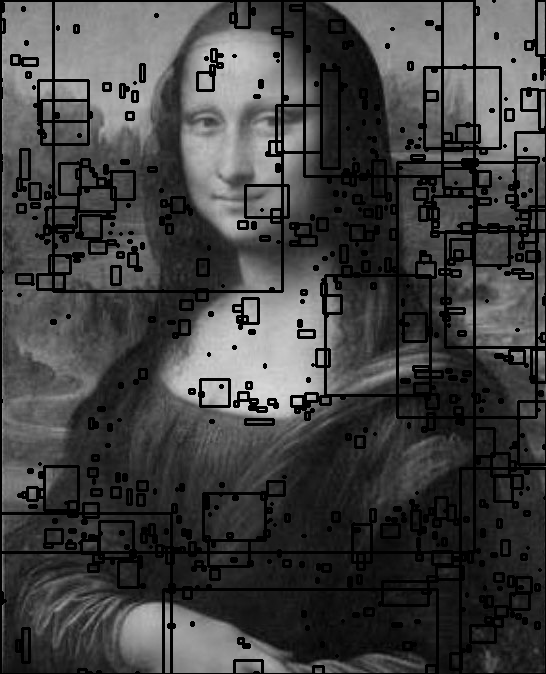

In [22]:
from PIL import Image
Image.fromarray(grayA) # Showing the real image with contours

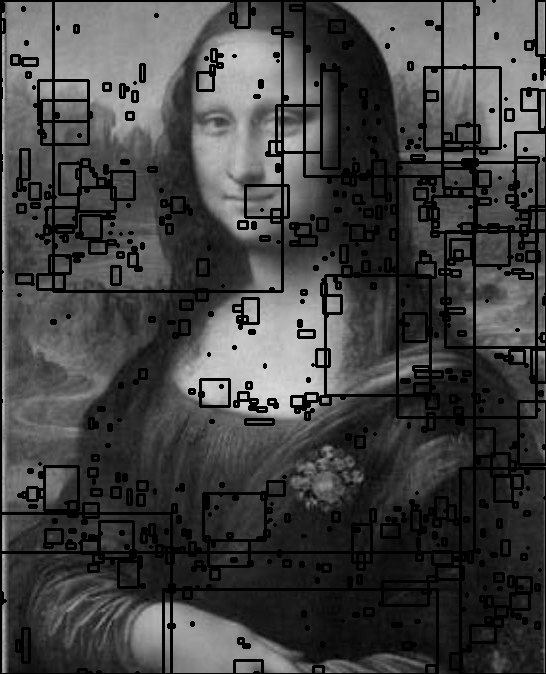

In [23]:
Image.fromarray(grayB) # Showing the fake image with contours

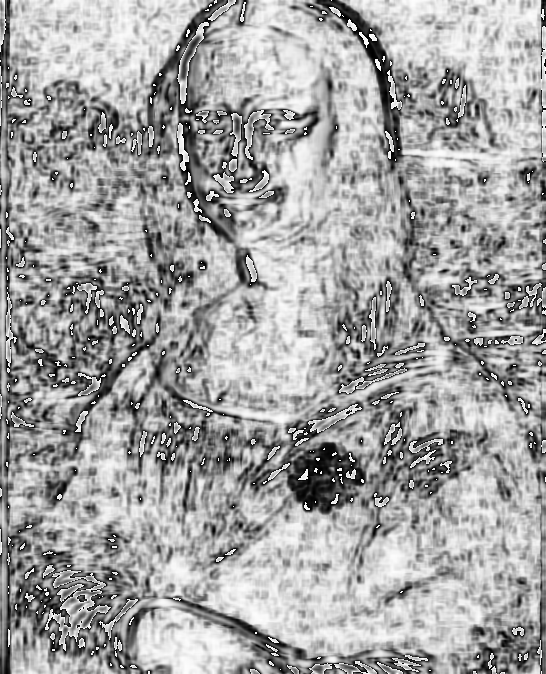

In [24]:
Image.fromarray(diff) # Showing the differnce in both the images

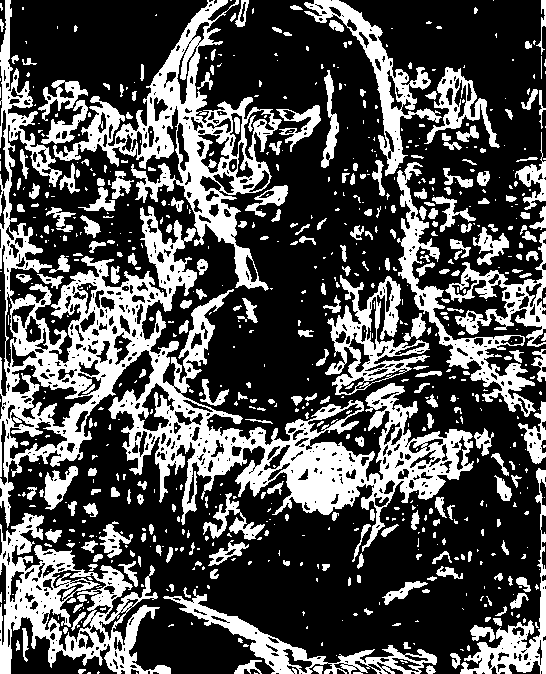

In [25]:
Image.fromarray(th) # Showing the thresold distribution in both the images

**Summary:** 
Since the similarity index between the two images is around 60%, we can consider the second image to be fake. Though many times the photograph quality gets prime importance, since a same image if taken from two diffent angles/ light conditions/ cameras can create different outputs.